![](header.jpg)

# The Airy Patter and Diffraction Limit

Kevin J. Walchko, Phd

13 Mar 2021

---

The airy pattern is how light impacts a focal plane array after passing through a camera lens' appature.

![](airy2.jpg)

This is important, because the resulting wave pattern looks like the sync function and deposites 84% of the energy at the main lobe. Ideally we want all of this energy to go into one pixel on the FPA, but there are trade offs camera designers make which imact the performance.

<img src="airy.webp" width="300px">

The first three dark rings occur at **radii** of 1.22, 2.23, and 3.24 $\lambda$/D respecively.

$$
airy = 2 \cdot 1.22 \lambda \frac {f}{D} = 2.44 \lambda \cdot f/\#
$$

Every lens has an upper-performance limit dictated by the laws of physics and the Airy disk, known as the diffraction limit. This limit is the theoretical maximum resolving power of the lens given in line pairs per millimeter (lines/mm). A perfect lens, not limited by design, will still be diffraction limited.

This limit is the point where two Airy patterns are no longer distinguishable from each other. The diffraction-limited resolution, often referred to as the cutoff frequency of a lens, is calculated using the lens f/# and the wavelength of light. 

$$
\zeta_c = \frac {1}{\lambda f/ \#}
$$

When the diffraction limit is reached, the lens is incapable of resolving greater frequencies.

## F-Number (f/#) or F-Stop

The f/# is a ratio of focal length to appature such that you can think of it as a ratio or 1/# (from the f/# notation).

![](dof2.jpg)

Thus as seen above, the smaller the f/#, the larger the open appature, the more light that is allowed onto the focal plane. Additionally, the smaller an f/#, the smaller the depth of field is and how the image seems to be focused on one location while the rest of the image is out of focus. This can create some interesting images that focus a viewer attention to key areas. conversly, a larger f/# can bring the entire image into focus.

| f/#   | DOF   | FPA Light | Moving Subject |
|-------|-------|-----------|----------------|
| small | small | large     | crisp          |
| large | large | small     | blur           |

The f-number N is:

$$
N = \frac {f}{D}
$$

where $f$  is the focal length and D is the entrence appature. Some airy disk sizes calculated for various wavelengths and f/#'s.

| Color  | $\lambda$ | f/1.4 | f/2.8 | f/4  | f/8   | f/16  |
|--------|-----------|-------|-------|------|-------|-------|
| NIR    | 880       | 3.01  | 6.01  | 8.59 | 17.18 | 34.36 |
| Red    | 660       | 2.25  | 4.51  | 6.44 | 12.88 | 25.77 |
| Green  | 520       | 1.78  | 3.55  | 5.08 | 10.15 | 20.30 |
| Blue   | 470       | 1.61  | 3.21  | 4.59 | 9.17  | 18.35 |
| Violet | 405       | 1.38  | 2.77  | 3.95 | 7.91  | 15.81 |

## References

- Edmond Optics: [The Airy Disk and Diffraction Limit](https://www.edmundoptics.com/knowledge-center/application-notes/imaging/limitations-on-resolution-and-contrast-the-airy-disk/)
- wikipedia: [f-number](https://en.wikipedia.org/wiki/F-number)

In [33]:
from matplotlib import pyplot as plt
from math import sin, cos, acos, pi

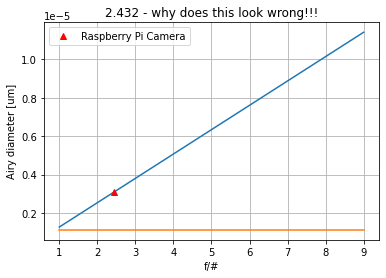

In [109]:
def airyDisk(wavelength, fnumber):
    """
    wavelenght: length of light wave in nano-meters (um)
    fnumber: focal length over appature diameter (unitless)
    
    returns: 2.44*wavelength*fnumber
    """
    return 2.44*wavelength*fnumber

air = []
fnum = []
pix = []

fw = 520e-9  # nm
f = 3.04     # focal length [mm]
D = 1.25     # appature diameter of camera [mm] 
pifnum = f/D # f-number
pipixel  = 1.12e-6 # 1.12um pixel size

for fn in range(1,10):
    a = airyDisk(fw, fn) # um
    air.append(a)
    fnum.append(fn)
    pix.append(pipixel)
    
# if this is right, then this has a Q of a 4 ... wtf?
plt.plot(fnum, air)
plt.plot(fnum, pix)
plt.plot(pifnum, airyDisk(fw, pifnum), 'r^', label="Raspberry Pi Camera")
plt.grid(True)
plt.legend()
plt.xlabel("f/#")
plt.ylabel("Airy diameter [um]")
plt.title(f"{pifnum} - why does this look wrong!!!");

In [119]:
# isn't this a shit Q-factor?
print(f"Pi Camera Quality Factor: {airyDisk(fw, pifnum)/pipixel: 0.1f}")

Pi Camera Quality Factor:  2.8


In [99]:
airyDisk(880, 1.4)

3006.0799999999995

In [98]:
airyDisk(880,2.8)

6012.159999999999

In [126]:
1/(1.4*520e-9)

1373626.3736263737